In [ ]:
import torch
import numpy as np
import random
import matplotlib.pyplot as plt
import torchvision as thv
import cv2
train = thv.datasets.MNIST('./', download=True , train=True)
val = thv.datasets.MNIST('./', download=True , train=False)
print(train.data.shape , len(train.targets))

torch.Size([60000, 28, 28]) 60000


In [ ]:
X_temp = np.concatenate((train.data[np.where(train.targets==0)],train.data[np.where(train.targets==1)]))/255.0
X_train = np.zeros((X_temp.shape[0],14*14))
X_temp = X_temp.reshape(X_temp.shape[0], -1).astype(np.float32)
for i in range(X_temp.shape[0]):
  X_train[i] = cv2.resize(X_temp[i].reshape((28,28)),(14,14)).flatten()
X_train = np.concatenate((X_train, np.ones([X_train.shape[0],1])),axis=1)
y_train = np.concatenate((train.targets[np.where(train.targets==0)],train.targets[np.where(train.targets==1)]))
y_train[y_train==1] = -1
y_train[y_train==0] = 1


X_temp_val = np.concatenate((val.data[np.where(val.targets==0)],val.data[np.where(val.targets==1)]))/255.0
X_val = np.zeros((X_temp_val.shape[0],14*14))
X_temp_val = X_temp_val.reshape(X_temp_val.shape[0], -1).astype(np.float32)
for i in range(X_temp_val.shape[0]):
  X_val[i] = cv2.resize(X_temp_val[i].reshape((28,28)),(14,14)).flatten()
X_val = np.concatenate((X_val, np.ones([X_val.shape[0],1])),axis=1)
y_val = np.concatenate((val.targets[np.where(val.targets==0)],val.targets[np.where(val.targets==1)]))
y_val[y_val==1] = -1
y_val[y_val==0] = 1

In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((12665, 197), (12665,), (2115, 197), (2115,))

Gradient Descent

In [ ]:
lam_list = [0.00005,0.0001,0.001,0.01,0.1,0.5,1,3,4,5,7]
val_loss_list = []
lr = 0.001

for lam in lam_list:
  np.random.seed(1)
  W = np.random.rand(X_train.shape[1]).reshape(-1,1)

  for i in range(1000):
    loss = (np.sum(np.log(1+np.exp(-y_train.reshape(-1,1)*(X_train@W))))/len(y_train)+(lam*(W.T@W))/2)[0,0]
    grad_w = -(X_train.T@(y_train.reshape(-1,1)*np.exp(-y_train.reshape(-1,1)*(X_train@W))/(1+np.exp(-y_train.reshape(-1,1)*(X_train@W)))))/len(y_train)+ lam*W
    val_loss = (np.sum(np.log(1+np.exp(-y_val.reshape(-1,1)*(X_val@W))))/len(y_val)+(lam*(W.T@W))/2)[0,0]
    
    W = W - lr*grad_w

  val_loss_list.append(val_loss)
  print('Lambda:',lam,'Val loss:',val_loss)

Lambda: 5e-05 Val loss: 1.7808274021204018
Lambda: 0.0001 Val loss: 1.7821751582413972
Lambda: 0.001 Val loss: 1.8063853541213546
Lambda: 0.01 Val loss: 2.0433904608943334
Lambda: 0.1 Val loss: 3.9531847313453055
Lambda: 0.5 Val loss: 6.263733461625069
Lambda: 1 Val loss: 4.454691273023366
Lambda: 3 Val loss: 0.7830445795105057
Lambda: 4 Val loss: 0.6486009493980849
Lambda: 5 Val loss: 0.634122855526278
Lambda: 7 Val loss: 0.6449725866646647


In [ ]:
lam = lam_list[np.argmin(val_loss_list)]
lam

5

In [ ]:
np.random.seed(1)
W = np.random.rand(X_train.shape[1]).reshape(-1,1)

train_loss_list1 = []
val_loss_list1 = []

for i in range(1000):
  loss = (np.sum(np.log(1+np.exp(-y_train.reshape(-1,1)*(X_train@W))))/len(y_train)+(lam*(W.T@W))/2)[0,0]
  grad_w = -(X_train.T@(y_train.reshape(-1,1)*np.exp(-y_train.reshape(-1,1)*(X_train@W))/(1+np.exp(-y_train.reshape(-1,1)*(X_train@W)))))/len(y_train)+ lam*W
  val_loss = (np.sum(np.log(1+np.exp(-y_val.reshape(-1,1)*(X_val@W))))/len(y_val)+(lam*(W.T@W))/2)[0,0]
  
  W = W - lr*grad_w
  train_loss_list1.append(loss)
  val_loss_list1.append(val_loss)
  if i%50==1:
    print(loss, val_loss)

163.34385325689718 163.3931881953603
98.8708873783157 98.90742416873317
59.828485981677915 59.855209422853015
36.201670272312256 36.22095254044569
21.9246642674697 21.93840660244329
13.320633214124491 13.330355730137057
8.157283716612097 8.164137397564078
5.076457330459455 5.081219876328981
3.2501119757919543 3.253267410393427
2.17349662970121 2.1753779074535373
1.540811550389765 1.5416975050998964
1.1690508371717903 1.1691876267015142
0.9501296497869895 0.9497224713517833
0.8207731646426022 0.8199816675963085
0.7440525181405715 0.742994749431872
0.6983874645872351 0.6971478214341281
0.6711212092218863 0.6697587073652176
0.6547971158483308 0.6533523974258426
0.6450023666017952 0.6435031074695776
0.639114759272817 0.6375796370225695


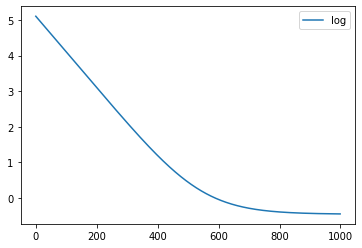

In [ ]:
plt.plot(np.log(train_loss_list1),label='log')

plt.legend()

Nesterov's acceleration

In [ ]:
np.random.seed(1)
W = np.random.rand(X_train.shape[1]).reshape(-1,1)
W_1 = W.copy()

r = 0.9
train_loss_list2 = []
val_loss_list2 = []


for i in range(1000):

  loss = (np.sum(np.log(1+np.exp(-y_train.reshape(-1,1)*(X_train@W))))/len(y_train)+(lam*(W.T@W))/2)[0,0]
  val_loss = (np.sum(np.log(1+np.exp(-y_val.reshape(-1,1)*(X_val@W))))/len(y_val)+(lam*(W.T@W))/2)[0,0]

  u = (1+r)*W-r*W_1
  grad_u = -(X_train.T@(y_train.reshape(-1,1)*np.exp(-y_train.reshape(-1,1)*(X_train@u))/(1+np.exp(-y_train.reshape(-1,1)*(X_train@u)))))/len(y_train)+ lam*u
  W_1 = W.copy()
  W = u - lr*grad_u

  train_loss_list2.append(loss)
  val_loss_list2.append(val_loss)
  if i%50==1:
    print(loss, val_loss)

163.34385325689715 163.39318819536027
0.7163646726579873 0.7110363090210546
0.6327070599613132 0.6314239096511011
0.6301995173713585 0.6285807251927139
0.630180582452377 0.6285858309184553
0.6301805347193886 0.6285842641656432
0.6301805346723965 0.6285843500652787
0.6301805346718306 0.6285843457501477
0.6301805346718262 0.6285843459343573
0.6301805346718262 0.6285843459286157
0.6301805346718261 0.6285843459286311
0.6301805346718262 0.6285843459286483
0.6301805346718261 0.6285843459286464
0.6301805346718262 0.6285843459286466
0.6301805346718262 0.6285843459286465
0.6301805346718262 0.6285843459286465
0.6301805346718261 0.6285843459286465
0.6301805346718261 0.6285843459286465
0.6301805346718261 0.6285843459286465
0.6301805346718261 0.6285843459286465


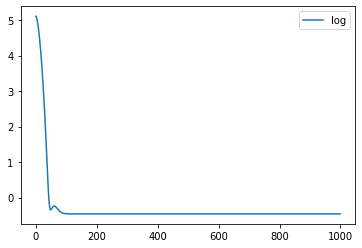

In [ ]:
plt.plot(np.log(train_loss_list2),label='log')

plt.legend()

Stochastic gradient descent

In [ ]:
# code borrowed from hw1 Q3
def shuffle_dataset(X, Y):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    return X[indices], Y[indices]

def batch_generator(X, Y, batch_size):
    while True:
        X, Y = shuffle_dataset(X, Y)
        for i in range((X.shape[0] - batch_size) // batch_size):
            yield X[i * batch_size: i * batch_size + batch_size], Y[i * batch_size: i * batch_size + batch_size]

train_dataloader = batch_generator(X_train, y_train, batch_size=64)

In [ ]:
np.random.seed(1)
W = np.random.rand(X_train.shape[1]).reshape(-1,1)

train_loss_list3 = []
val_loss_list3 = []

for i in range(1000):
  i += 1
  x, y = train_dataloader.__next__()

  # loss = (np.sum(np.log(1+np.exp(-y_train.reshape(-1,1)*(X_train@W))))/len(y_train)+(lam*(W.T@W))/2)[0,0]
  loss = (np.sum(np.log(1+np.exp(-y.reshape(-1,1)*(x@W))))/len(y)+(lam*(W.T@W))/2)[0,0]
  
  val_loss = (np.sum(np.log(1+np.exp(-y_val.reshape(-1,1)*(X_val@W))))/len(y_val)+(lam*(W.T@W))/2)[0,0]
  grad_w = -(x.T@(y.reshape(-1,1)*np.exp(-y.reshape(-1,1)*(x@W))/(1+np.exp(-y.reshape(-1,1)*(x@W)))))/len(y)+ lam*W
  
  W = W - lr*grad_w
  train_loss_list3.append(loss)
  val_loss_list3.append(val_loss)
  if i%50==1:
    print(loss, val_loss)

165.99133525237198 165.04135328400218
99.46766507667789 99.91829287621779
60.29458694697894 60.46672200787547
36.679087112829336 36.59542046991535
22.39924742386139 22.15614278212874
13.444469300765164 13.460265303232909
8.204220831012968 8.239674930928224
5.197369774215482 5.13012979128773
3.332257806904225 3.280622514875926
2.2090916405886025 2.1908711248067014
1.55605457352189 1.5513480292112205
1.2003034014955782 1.1749087831819343
0.9495040652487009 0.9532757889419018
0.8262182181774799 0.8217359923439155
0.7317126466937082 0.7441498950205128
0.7075137419214987 0.6978102112961545
0.6773478760187424 0.670207705863205
0.6536492810723252 0.6535987998277348
0.6571234936959419 0.6437338439282813
0.6502838471808705 0.637694875834391


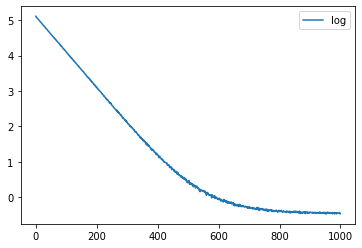

In [ ]:
plt.plot(np.log(train_loss_list3),label='log')

plt.legend()

SGD-with Nesterove

In [ ]:
np.random.seed(1)
W = np.random.rand(X_train.shape[1]).reshape(-1,1)
W_1 = W.copy()

r = 0.9
train_loss_list4 = []
val_loss_list4 = []

for i in range(1000):

  x, y = train_dataloader.__next__()

  # loss = (np.sum(np.log(1+np.exp(-y_train.reshape(-1,1)*(X_train@W))))/len(y_train)+(lam*(W.T@W))/2)[0,0]
  loss = (np.sum(np.log(1+np.exp(-y.reshape(-1,1)*(x@W))))/len(y)+(lam*(W.T@W))/2)[0,0]

  val_loss = (np.sum(np.log(1+np.exp(-y_val.reshape(-1,1)*(X_val@W))))/len(y_val)+(lam*(W.T@W))/2)[0,0]

  u = (1+r)*W-r*W_1
  grad_u = -(x.T@(y.reshape(-1,1)*np.exp(-y.reshape(-1,1)*(x@u))/(1+np.exp(-y.reshape(-1,1)*(x@u)))))/len(y)+ lam*u
  W_1 = W.copy()
  W = u - lr*grad_u

  train_loss_list4.append(loss)
  val_loss_list4.append(val_loss)
  if i%50==1:
    print(loss, val_loss)

163.6946925170075 163.39509849317537
0.6973415245926016 0.7088287464040784
0.6341695072062163 0.6311404506377438
0.6328542870595678 0.6286234087988006
0.6286502830900195 0.6285791749164582
0.6162368227283155 0.6285481658579585
0.6366759451247016 0.6288739382184982
0.6285387015600739 0.6285902356593749
0.6369066769009466 0.6285529332323944
0.6231812023398737 0.6286296188360403
0.6201137301784317 0.6288887634634422
0.6247009981186222 0.6286382652236502
0.6362037410952709 0.6287444898523674
0.6434473315591506 0.628704257459041
0.6340181174382027 0.6286510568052195
0.6285094772269469 0.6286511746039828
0.6330758051602471 0.6285710988047166
0.6351698550185271 0.6288896470487347
0.6185239716023722 0.6288024805898083
0.6408003817647047 0.6286374795173211


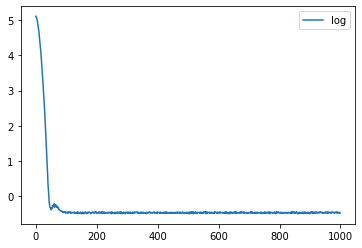

In [ ]:
plt.plot(np.log(train_loss_list4),label='log')

plt.legend()

Text(0, 0.5, 'log scale of train loss')

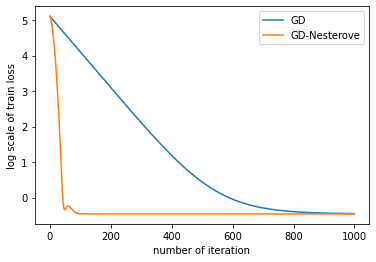

In [ ]:
plt.plot(np.log(train_loss_list1),label='GD')
plt.plot(np.log(train_loss_list2),label='GD-Nesterove')
plt.legend()
plt.xlabel('number of iteration')
plt.ylabel('log scale of train loss')

Text(0, 0.5, 'log scale of train loss')

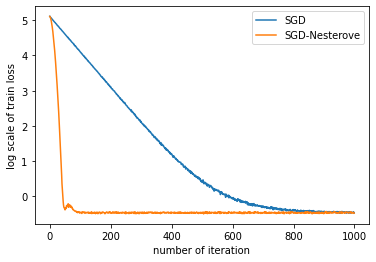

In [ ]:
plt.plot(np.log(train_loss_list3),label='SGD')
plt.plot(np.log(train_loss_list4),label='SGD-Nesterove')
plt.legend()
plt.xlabel('number of iteration')
plt.ylabel('log scale of train loss')